In [12]:
import numpy as np
import pandas as pd
import os
# Correctly initialize the DataFrame with column names
theta_rej = pd.DataFrame(columns=['Theta', 'Rejection Rate'])
FILE_NAME = 'penalty_3.09_window_20.txt'
path = os.path.join(os.getcwd(),'results/theta_rej_rate' ,FILE_NAME)
with open(path, 'r') as results:
    lines = results.readlines()
    for line in lines:
        parts = line.split(',')
        if len(parts) == 2:  # Check if the line is correctly formatted
            theta = float(parts[0].split(':')[1].strip())
            rej_rate = float(parts[1].split(':')[1].strip())
            
            # Append the new row to the DataFrame, set ignore_index=True to reindex
            theta_rej.loc[len(theta_rej)] = [theta,rej_rate]
theta_rej.sort_values(by='Theta', inplace=True)
theta_rej

,Theta,Rejection Rate
134,0.0,0.351924
40,0.0,0.349055
41,0.0,0.347462
49,0.0,0.341953
51,0.0,0.348646
...,...,...
18,30.0,0.369224
25,30.0,0.361575
5,30.0,0.352971
4,30.0,0.357387


In [24]:
# Calculating mean rejection rate for each theta
mean_rejection_rates = theta_rej.groupby('Theta')['Rejection Rate'].mean()
mean_rejection_rates

Theta
0.0     0.349892
0.1     0.364808
0.2     0.360452
0.3     0.363328
0.4     0.364489
0.5     0.366551
0.6     0.368192
0.7     0.364512
0.8     0.366884
0.9     0.367885
1.0     0.365418
1.5     0.363369
2.0     0.364803
3.0     0.365067
4.0     0.366428
5.0     0.365741
6.0     0.366465
7.0     0.368076
8.0     0.368331
9.0     0.361074
10.0    0.365504
20.0    0.368432
30.0    0.364207
Name: Rejection Rate, dtype: float64

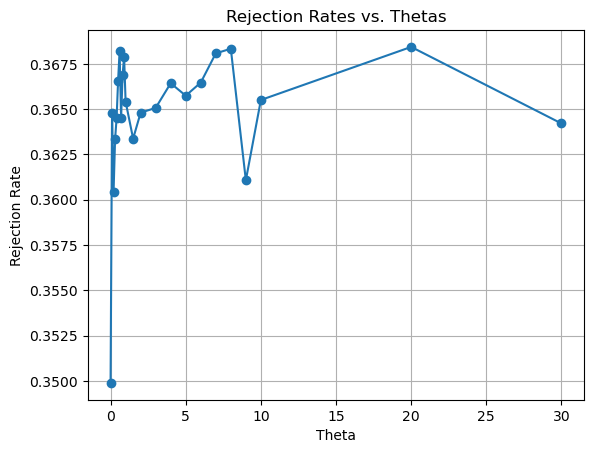

In [25]:
from matplotlib import pyplot as plt
# Plot
theta_list = mean_rejection_rates.index
rej_rate_list = mean_rejection_rates.values
plt.plot(theta_list, rej_rate_list, marker='o')
plt.xlabel('Theta')
plt.ylabel('Rejection Rate')
plt.title('Rejection Rates vs. Thetas')
# plt.xticks(theta_list, rotation=90)
plt.grid(True)
plt.show()